### Getting Started

In [1]:
pip install pandas_datareader


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install getFamaFrenchFactors


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from scipy import stats
import pandas as pd
import pandas_datareader as web 
import datetime
import matplotlib.pyplot as plt
import getFamaFrenchFactors as gff
%matplotlib inline

In [4]:
start=datetime.datetime(2012,1,1)
end=datetime.datetime(2022,8,16)

In [5]:
df_b=web.DataReader("GOOGL","yahoo",start,end)['Adj Close']
# df_b=web.DataReader("M&M.NS","yahoo",start,end)['Adj Close']
df_b.head()

Date
2012-01-03    16.651901
2012-01-04    16.723724
2012-01-05    16.491741
2012-01-06    16.266768
2012-01-09    15.577077
Name: Adj Close, dtype: float64

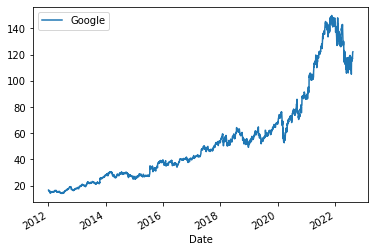

In [6]:
df_b.plot(label = 'Google')
plt.legend()

In [7]:
mon_b = df_b.resample('1M').last()
mon_b_ret = mon_b.pct_change().dropna()

In [8]:
mon_b_ret.head()

Date
2012-02-29    0.065746
2012-03-31    0.037186
2012-04-30   -0.056749
2012-05-31   -0.039663
2012-06-30   -0.001360
Freq: M, Name: Adj Close, dtype: float64

In [9]:
ff3 = pd.DataFrame(gff.famaFrench3Factor(frequency='m'))

#create a seq of dates
date_seq = pd.date_range(start=start, end=end,freq='M')

#set date columns
ff3 = ff3.rename(columns = {'date_ff_factors':'Date'})

In [10]:
data = pd.merge(mon_b_ret,ff3,on='Date',how='left')
data = data.set_index('Date')

data = data.dropna()

In [11]:
data

,Adj Close,Mkt-RF,SMB,HML,RF
Date,,,,,
2012-02-29,0.065746,0.0442,-0.0186,0.0043,0.0000
2012-03-31,0.037186,0.0311,-0.0066,0.0112,0.0000
2012-04-30,-0.056749,-0.0085,-0.0041,-0.0077,0.0000
2012-05-31,-0.039663,-0.0619,0.0009,-0.0106,0.0001
2012-06-30,-0.001360,0.0389,0.0064,0.0059,0.0000
...,...,...,...,...,...
2022-02-28,-0.001822,-0.0229,0.0218,0.0309,0.0000
2022-03-31,0.029695,0.0305,-0.0161,-0.0182,0.0001
2022-04-30,-0.179467,-0.0946,-0.0140,0.0616,0.0001


## Implementing the Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [13]:
y = data['Adj Close']
X = data[['Mkt-RF','SMB','HML']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42);

In [15]:
reg = LinearRegression()

In [16]:
reg.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = reg.predict(X_test)

In [18]:
r2_score(y_pred,y_test)

0.43355706899333935

In [19]:
reg.coef_

array([ 1.10092093, -0.44513975, -0.27616914])

In [20]:
Mkt, SMB, HML=reg.coef_

In [21]:
Int = reg.intercept_

#### Expected Montly Returns = Int + Mkt * (data['Mkt-RF']) + SMB * (data['SMB']) + HML * (data['HML'])